### Trip Volume Analysis
## How has the volume of Bixi trips changed over time?

using open data from bixi's website from 2014 to 2024

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

## Part 1 : Cleaning data

In [4]:
data_folder = 'raw_data/'
files = os.listdir(data_folder)
csv_files = [f for f in files]
csv_files

['.DS_Store',
 'BixiMontrealRentals2016',
 'BixiMontrealRentals2018',
 'BixiMontrealRentals2020',
 'BixiMontrealRentals2021',
 'BixiMontrealRentals2019',
 'BixiMontrealRentals2017',
 'BixiMontrealRentals2015',
 'BixiMontrealRentals2023',
 'BixiMontrealRentals2024',
 'BixiMontrealRentals2022',
 'BixiMontrealRentals2014']

### Cleaning 2014 - 2019

In [5]:
def cleanMonthlyDataFor(year):
    # Path to the folder containing year data files
    data_folder = f'raw_data/BixiMontrealRentals{year}/'

    # List of files to be processed
    files = [f for f in os.listdir(data_folder) if f.startswith(f'OD_{year}') and f.endswith('.csv')]

    # List to store month and row count (volume)
    data = []

    # Loop through each file, read it, and count the rows
    for file in files:
        # Extract the month from the filename (e.g., 'OD_{year}-04.csv' -> 04)
        month = file.split('-')[1].split('.')[0]
        
        # Read the file into a DataFrame
        file_path = os.path.join(data_folder, file)
        df = pd.read_csv(file_path)
        
        # Count the number of rows (excluding the header)
        volume = len(df)
        
        # Store the month and volume in the data list
        data.append({'month': int(month), 'volume': volume})

    # Create a DataFrame from the collected data
    result_df = pd.DataFrame(data)

    # Sort the DataFrame by month to ensure the order is correct
    result_df = result_df.sort_values(by='month')

    # Define the output path for the cleaned file
    output_path = f'question1_data/{year}_cleaned.csv'

    # Save the cleaned data to a new CSV file
    result_df.to_csv(output_path, index=False)

    print(f"Cleaned data written to {output_path}")


In [6]:
for year in range(2014,2020):
    cleanMonthlyDataFor(year)

Cleaned data written to question1_data/2014_cleaned.csv
Cleaned data written to question1_data/2015_cleaned.csv
Cleaned data written to question1_data/2016_cleaned.csv
Cleaned data written to question1_data/2017_cleaned.csv
Cleaned data written to question1_data/2018_cleaned.csv


/var/folders/3s/z5bjp2_j3_525q4w1h0qhgpw0000gn/T/ipykernel_4023/1152578176.py:18: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Cleaned data written to question1_data/2019_cleaned.csv


### Cleaning 2020 - 2021

In [7]:
def cleanYearlyDataFor(year):
    # Path to the {year} data file
    data_file = f'raw_data/BixiMontrealRentals{year}/OD_{year}.csv'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(data_file)

    # Convert the 'start_date' column to datetime format
    df['start_date'] = pd.to_datetime(df['start_date'])

    # Extract the month from the 'start_date' column
    df['month'] = df['start_date'].dt.month

    # Group by month and count the number of rows (volume) for each month
    monthly_volume = df.groupby('month').size().reset_index(name='volume')

    # Define the output path for the cleaned file
    output_path = f'question1_data/{year}_cleaned.csv'

    # Save the cleaned data to a new CSV file
    monthly_volume.to_csv(output_path, index=False)

    print(f"Cleaned data written to {output_path}")



In [8]:
for year in range(2020,2022):
    cleanYearlyDataFor(year)

Cleaned data written to question1_data/2020_cleaned.csv
Cleaned data written to question1_data/2021_cleaned.csv


### Cleaning 2022 - 2024

In [11]:
def cleanYearlyLinuxTStmpDataFor(year):
    # Path to the {year} data file
    data_file = f'raw_data/BixiMontrealRentals{year}/OD_{year}.csv'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(data_file)
        
    # Convert 'STARTTIMEMS' (Linux timestamp in milliseconds) to datetime
    df['start_time'] = pd.to_datetime(df['STARTTIMEMS'], unit='ms')

    # Extract the month from the 'start_time' column
    df['month'] = df['start_time'].dt.month

    # Group by month and count the number of rows (volume) for each month
    monthly_volume = df.groupby('month').size().reset_index(name='volume')

    # Define the output path for the cleaned file
    output_path = f'question1_data/{year}_cleaned.csv'

    # Save the cleaned data to a new CSV file
    monthly_volume.to_csv(output_path, index=False)

    print(f"Cleaned data written to {output_path}")


In [13]:
for year in range(2022,2025):
    cleanYearlyLinuxTStmpDataFor(year)

Cleaned data written to question1_data/2022_cleaned.csv
Cleaned data written to question1_data/2023_cleaned.csv
Cleaned data written to question1_data/2024_cleaned.csv


## Part 2 : Analyse and Visualize data

### Plot individually

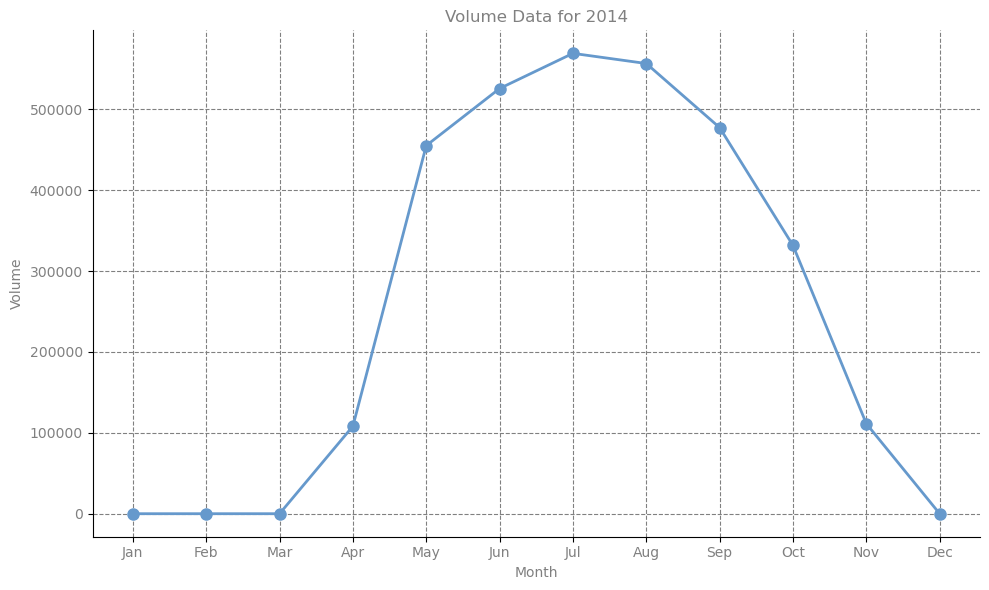

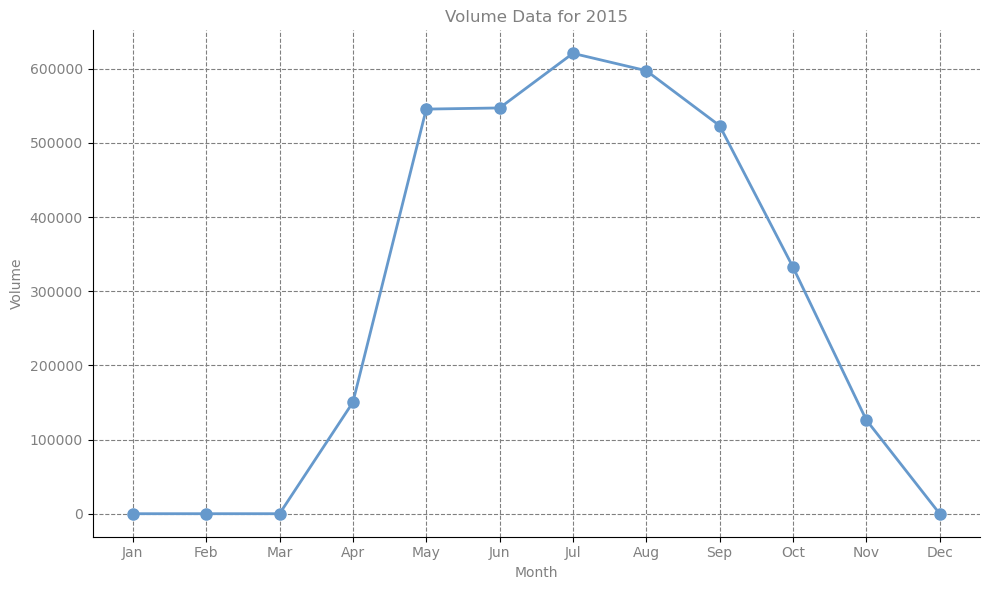

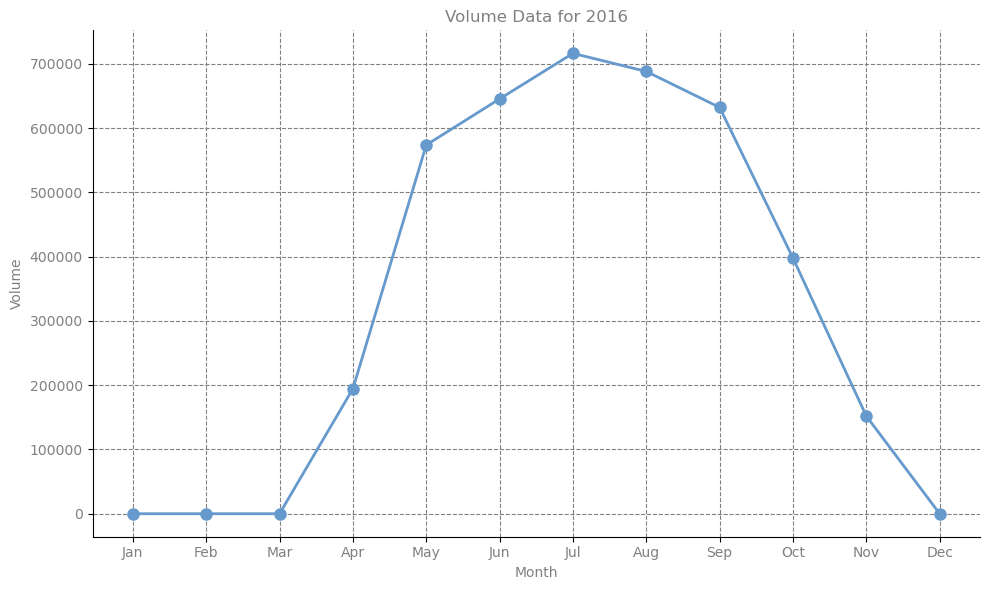

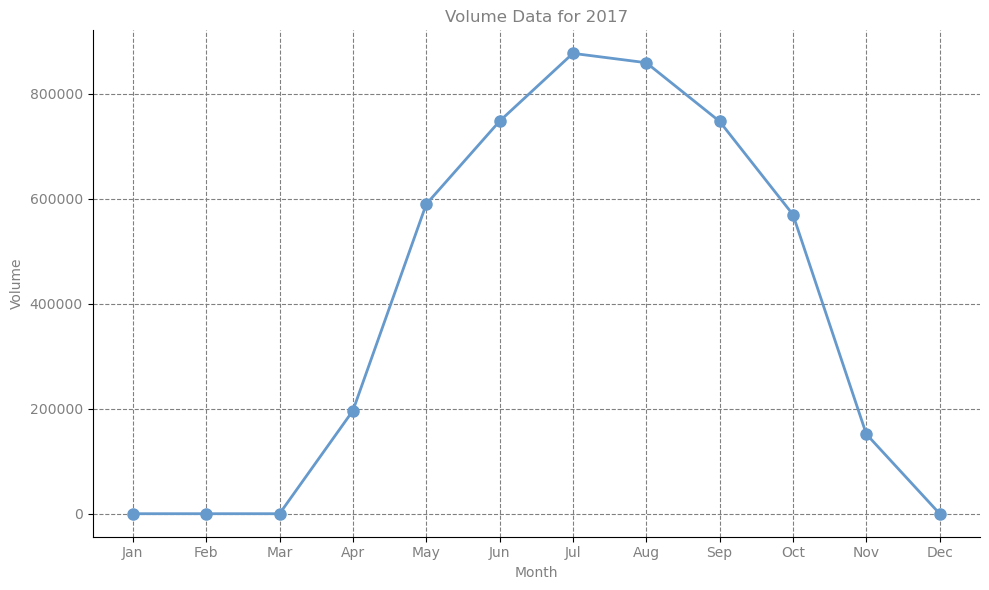

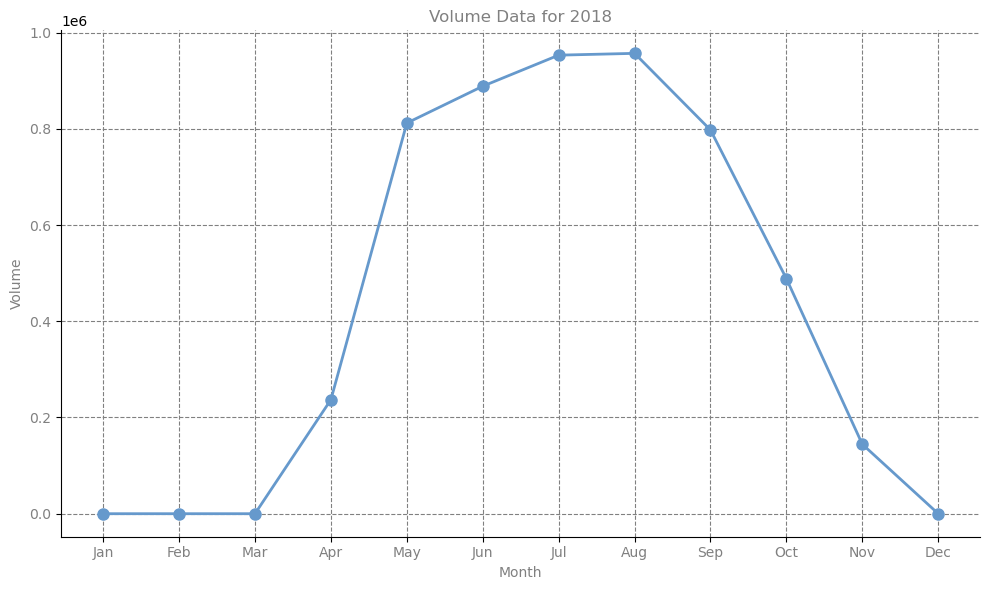

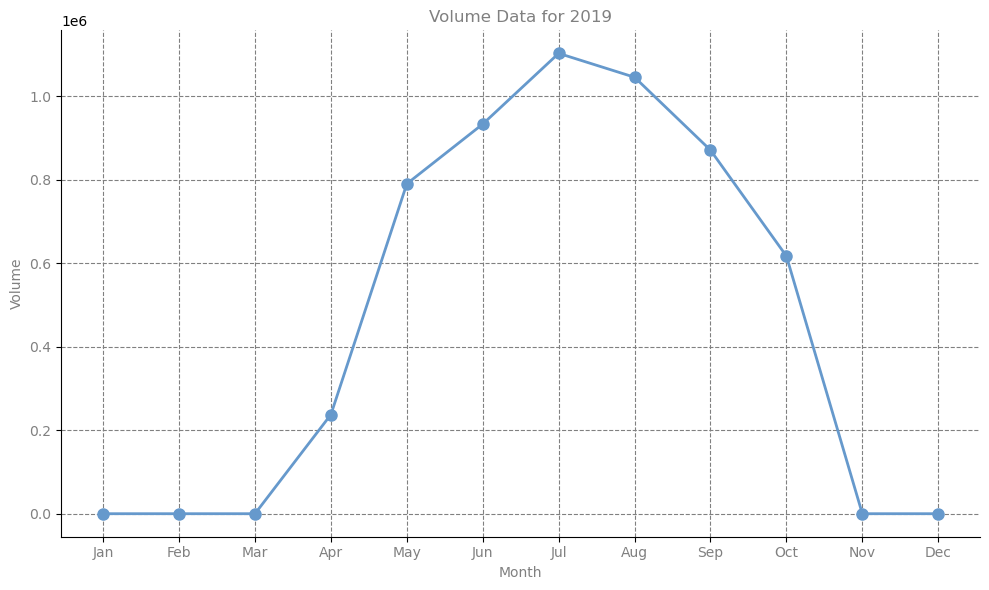

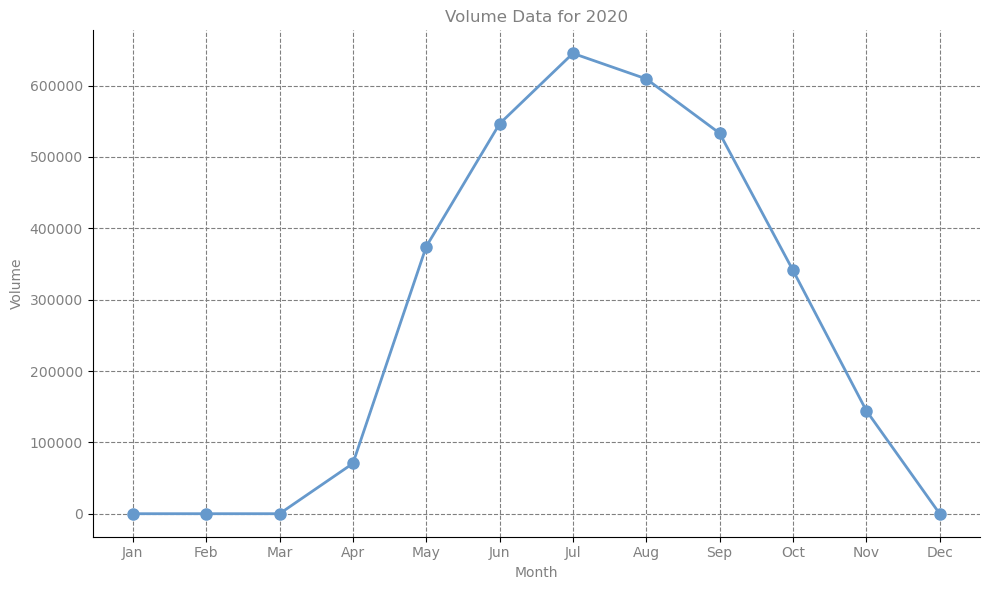

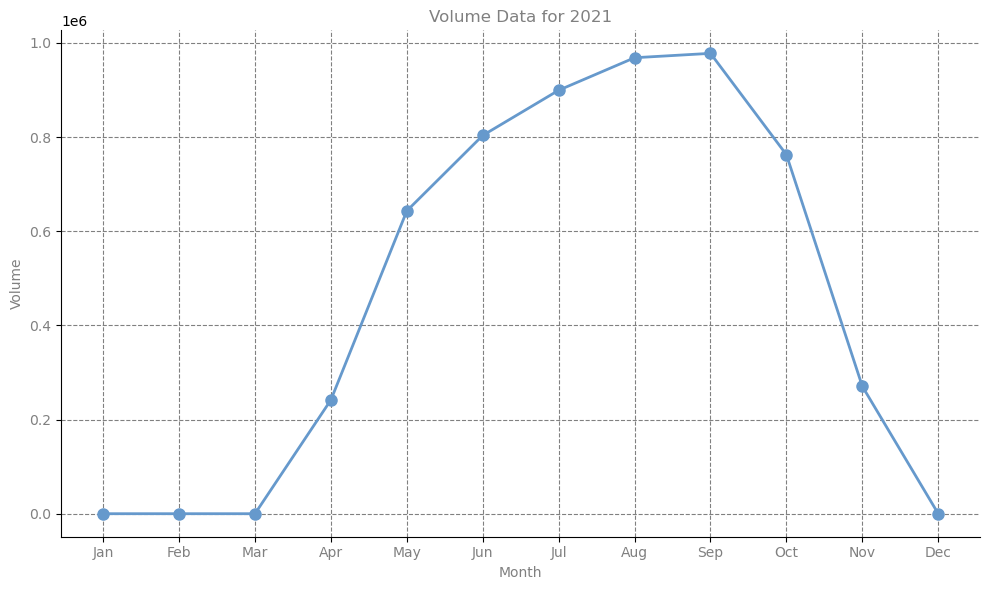

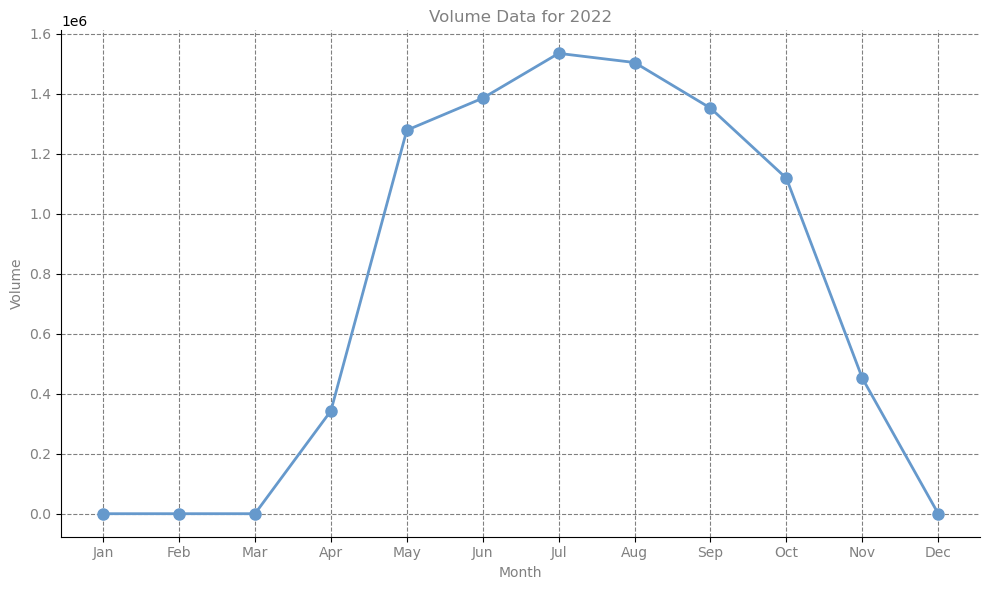

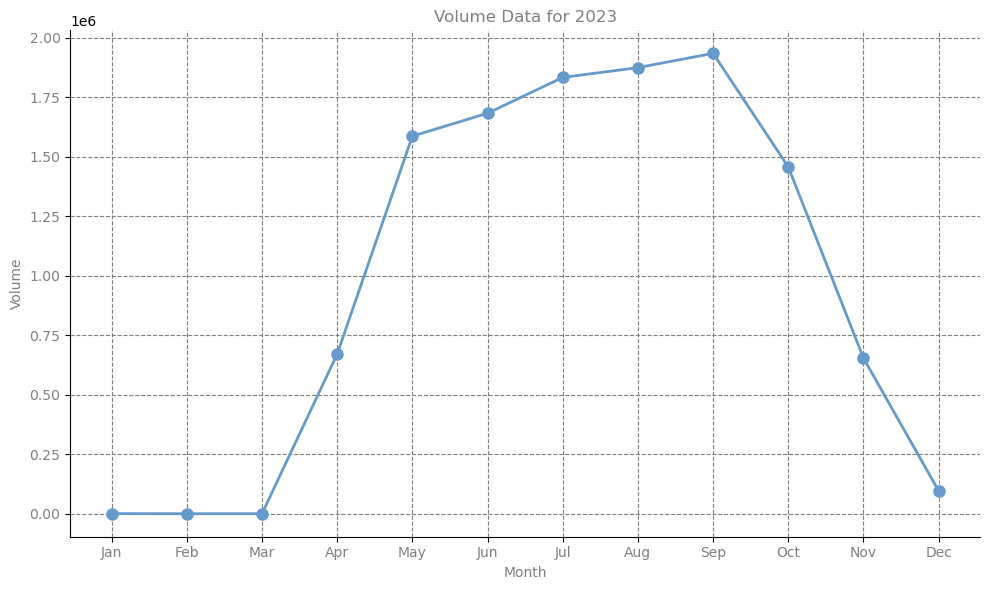

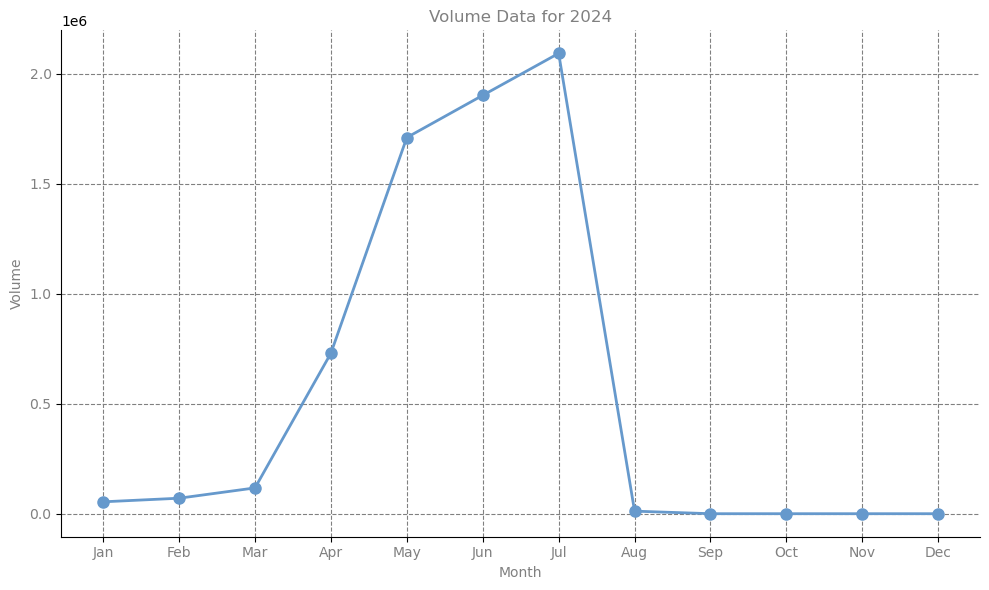

In [21]:
# Define the directory containing the files
directory = "question1_data/"

# List to hold DataFrames
dfs = []

# Read all CSV files from the directory
for file_name in os.listdir(directory):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory, file_name)
        # Extract year from the file name
        year = file_name.split('_')[0]
        # Read CSV file
        df = pd.read_csv(file_path)
        # Rename columns
        df.rename(columns={'Month': 'month', 'Volume': 'volume'}, inplace=True)
        df['Year'] = year  # Add a column for the year
        dfs.append(df)

# Concatenate all DataFrames into one
data = pd.concat(dfs, ignore_index=True)

# Convert month column to string
data['month'] = data['month'].apply(lambda x: pd.Timestamp(f'{int(x)}/1/2020').strftime('%b'))

# Define color and style
line_color = "#6699CC"
axis_color = "grey"

def plotYearlyDataFor(year):
    """Plot the volume data for a specific year."""
    # Create a DataFrame for the year with all months
    all_months = pd.DataFrame({'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']})
    all_months['Year'] = year
    
    # Merge with the actual data for the year
    df_year = pd.merge(all_months, data[data['Year'] == year], on=['month', 'Year'], how='left')
    
    # Fill missing values with 0 (or NaN if preferred)
    df_year['volume'] = df_year['volume'].fillna(0)
    
    # Ensure months are sorted
    df_year['month'] = pd.Categorical(df_year['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                                      ordered=True)
    df_year = df_year.sort_values('month')
    
    # Create a plot
    plt.figure(figsize=(10, 6))
    
    # Plot line and markers
    plt.plot(df_year['month'], df_year['volume'], color=line_color, marker='o', linestyle='-', linewidth=2, markersize=8)
    
    # Customize axis
    plt.xlabel('Month', color=axis_color)
    plt.ylabel('Volume', color=axis_color)
    plt.xticks(color=axis_color, rotation=0)  # Set x-axis text to horizontal
    plt.yticks(color=axis_color)
    plt.grid(True, linestyle='--', color=axis_color)
    
    # Remove chart borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Title and show plot
    plt.title(f'Volume Data for {year}', color=axis_color)
    plt.tight_layout()
    plt.show()

# Plot data for each year in order
years = sorted(data['Year'].unique())
for year in years:
    plotYearlyDataFor(year)


### Comparison

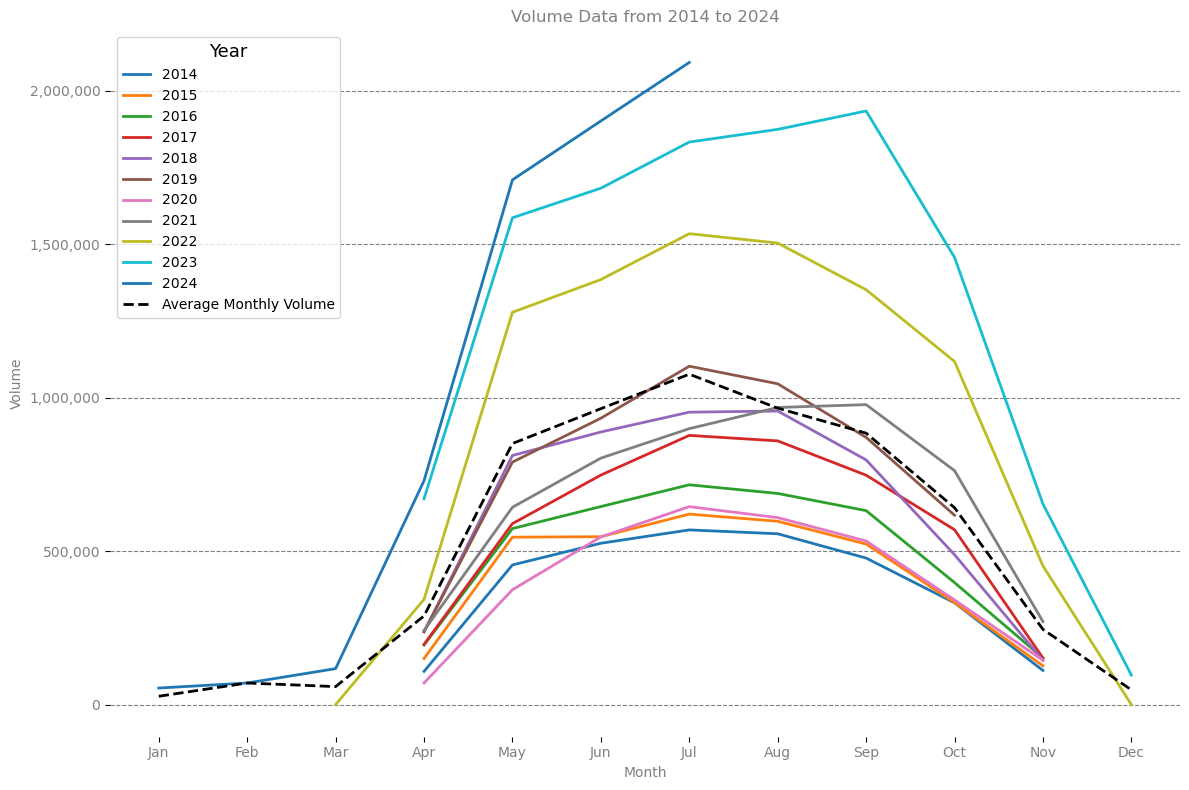

In [43]:
# Define the directory containing the files
directory = "question1_data/"

# List to hold DataFrames
dfs = []

# Read all CSV files from the directory
for file_name in os.listdir(directory):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory, file_name)
        # Extract year from the file name
        year = file_name.split('_')[0]
        # Read CSV file
        df = pd.read_csv(file_path)
        # Rename columns
        df.rename(columns={'Month': 'month', 'Volume': 'volume'}, inplace=True)
        df['Year'] = year  # Add a column for the year
        dfs.append(df)

# Concatenate all DataFrames into one
data = pd.concat(dfs, ignore_index=True)

# Define the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert month column to string
data['month'] = data['month'].apply(lambda x: pd.Timestamp(f'{int(x)}/1/2020').strftime('%b'))

# Define a color palette for different years
colors = sns.color_palette("tab10", n_colors=len(data['Year'].unique()))

def plotAllYears():
    """Plot volume data for all years in one plot with different colors for each year."""
    plt.figure(figsize=(12, 8))
    
    # Define a list of years to plot
    years_to_plot = sorted(data['Year'].unique())
    
    # Create a color map for years
    color_map = {year: colors[i] for i, year in enumerate(years_to_plot)}
    
    # Calculate the average volume per month
    avg_volume = data.groupby('month')['volume'].mean().reindex(month_order)
    
    for year in years_to_plot:
        # Create a DataFrame for the year with all months
        all_months = pd.DataFrame({'month': month_order})
        all_months['Year'] = year
        
        # Merge with the actual data for the year
        df_year = pd.merge(all_months, data[data['Year'] == year], on=['month', 'Year'], how='left')
        
        # Fill missing values with NaN to facilitate filtering
        df_year['volume'] = df_year['volume'].fillna(np.nan)
        
        # Ensure months are sorted
        df_year['month'] = pd.Categorical(df_year['month'], categories=month_order, ordered=True)
        df_year = df_year.sort_values('month')
        
        # Special handling for 2024
        if year == '2024':
            df_year = df_year[df_year['month'].isin(month_order[:9])]  # Only up to September
        
        # Plot line with different color for each year
        plt.plot(df_year['month'], df_year['volume'], color=color_map[year], linestyle='-', linewidth=2, label=year)
        
        # Add year label with same color
        #last_month_index = df_year.index[-1]
        #plt.text(df_year['month'].iloc[-1], df_year['volume'].iloc[-1], year, 
                 #color=color_map[year], fontsize=10, ha='left', va='center')
    
    # Plot the average volume line
    plt.plot(month_order, avg_volume, color='black', linestyle='--', linewidth=2, label='Average Monthly Volume')
    
    # Customize axis
    plt.xlabel('Month', color='grey')
    plt.ylabel('Volume', color='grey')
    plt.xticks(ticks=month_order, labels=month_order, color='grey', rotation=0)  # Full month names
    plt.yticks(color='grey')
    
    # Add only horizontal grid lines
    plt.grid(axis='y', linestyle='--', color='grey')
    
    # Remove chart borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    
    # Format y-axis to use full number representation
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
    # Title and show legend
    plt.title('Volume Data from 2014 to 2024', color='grey')
    plt.legend(title='Year', title_fontsize='13', fontsize='10', loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot data for all years
plotAllYears()
